In [57]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# 데이터 불러오기
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
# 데이터 정보 확인
df.info() # 891행 15열 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [60]:
# 데이터 통계량 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# 중복값 확인
df.duplicated().sum()

107

In [62]:
# 중복값 제거
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [63]:
# 결측치 확인
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
# age 결측치 처리
# who 변수를 기준으로 성인 남자 평균, 성인 여자 평균, 아이 평균을 각각의 결측값에 대입
who_value = df['who'].value_counts()
who_value

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [65]:
# 성인 남자 나이 평균
man_mean = df.loc[df['who'] == 'man', 'age'].mean()
# 성인 여자 나이 평균
woman_mean = df.loc[df['who'] == 'woman', 'age'].mean()
# 아이 나이 평균
child_mean = df.loc[df['who'] == 'child', 'age'].mean()

print(f'성인 남자 나이 평균: {man_mean}')
print(f'성인 여자 나이 평균: {woman_mean}')
print(f'아이 나이 평균: {child_mean}')

성인 남자 나이 평균: 33.17312348668281
성인 여자 나이 평균: 32.0
아이 나이 평균: 6.369518072289156


In [66]:
age_list = []

for i in range(len(df)):
    if pd.isna(df['age'][i]) == True:
        if df['who'][i] == 'man':
            age_list.append(man_mean)
        elif df['who'][i] == 'woman':
            age_list.append(woman_mean)
        else:
            age_list.append(child_mean)
    else:
        age_list.append(df['age'][i])

age_list

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 33.17312348668281,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 33.17312348668281,
 31.0,
 32.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 33.17312348668281,
 19.0,
 32.0,
 33.17312348668281,
 40.0,
 32.0,
 32.0,
 66.0,
 28.0,
 42.0,
 33.17312348668281,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 33.17312348668281,
 3.0,
 19.0,
 33.17312348668281,
 33.17312348668281,
 32.0,
 33.17312348668281,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 33.17312348668281,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 33.17312348668281,
 33.17312348668281,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 33.17312348668281,
 33.17312348668281,
 0.83,
 30.0,
 22.0,
 29.0,
 32.0,
 28.0,
 17.0,
 33.0,
 16.0,
 33.17312348668281,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 33.17312348668281,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 33.17312348668281,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 33.17312348668281,
 38.0,
 32.0,
 47.

In [67]:
df['new_age'] = age_list
df.drop('age', axis = 1, inplace = True)

In [68]:
# 나이 결측값 처리 완료
df.isna().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_age          0
dtype: int64

In [69]:
# embarked와 embark_town 동일한 데이터인지 확인
df[['embarked', 'embark_town']].value_counts()

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

In [70]:
# 동일한 데이터이므로 embarked 삭제
df.drop('embarked', axis = 1, inplace = True)
df.isna().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_age          0
dtype: int64

In [71]:
# deck 결측치 처리하기
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [72]:
# 결측치가 너무 많아 deck 컬럼 제거
df.drop('deck', axis = 1, inplace = True)
df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,new_age
0,0,3,male,1,0,7.2500,Third,man,True,Southampton,no,False,22.0
1,1,1,female,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0
2,1,3,female,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0
3,1,1,female,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,0,0,8.0500,Third,man,True,Southampton,no,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,Southampton,no,True,27.0
887,1,1,female,0,0,30.0000,First,woman,False,Southampton,yes,True,19.0
888,0,3,female,1,2,23.4500,Third,woman,False,Southampton,no,False,32.0
889,1,1,male,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.0


In [73]:
# deck 결측값 처리 완료
df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
new_age        0
dtype: int64

In [74]:
# embark_town 결측치 처리
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [75]:
# embark_town의 결측치가 2개 밖에 안되므로 최빈값으로 대체
df.fillna({'embark_town' : df['embark_town'].mode()[0]}, inplace = True)

In [76]:
# 모든 결측치 처리
df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
new_age        0
dtype: int64

In [77]:
# 생존자 중 성별 비율
gender_survived = df.loc[df['survived'] == 1, ['survived', 'sex']]
value_list = list(gender_survived.value_counts())
x_list = [gender_survived.value_counts().index[i][1] for i in range(2)]

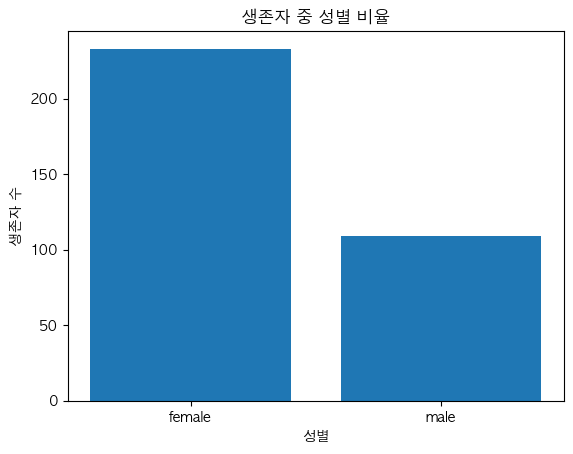

survived  sex   
1         female    233
          male      109
Name: count, dtype: int64

In [78]:
plt.bar(x_list, value_list)
plt.title('생존자 중 성별 비율')
plt.xlabel('성별')
plt.ylabel('생존자 수')
plt.rcParams['font.family'] = 'AppleGothic'
plt.show()
# 여성이 더 많이 생존

gender_survived.value_counts()

In [79]:
# 나이별 생존자의 성별 비율 비교
df['new_age'].describe() # 최솟값, 최댓값 확인

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: new_age, dtype: float64

In [80]:
bins = [0, 10, 20, 30, 40, 50, 60, 90]
labels = ['0~9세', '10대', '20대', '30대', '40대', '50대', '60세 이상']

df['age_group'] = pd.cut(df['new_age'], bins = bins, labels = labels, right = False)
# 나이대별 생존자의 
data = df.loc[df['survived'] == 1, ['survived', 'age_group', 'sex']]
data

,survived,age_group,sex
1,1,30대,female
2,1,20대,female
3,1,30대,female
8,1,20대,female
9,1,10대,female
...,...,...,...
875,1,10대,female
879,1,50대,female
880,1,20대,female
887,1,10대,female


In [81]:
labels = ['0~9세', '10대', '20대', '30대', '40대', '50대', '60세 이상']

In [82]:
# 각 연령대별 여성 생존자 수 리스트 생성
woman_list = []

for i in labels:
    woman_list.append(list(data.loc[data['age_group'] == i, 'sex'].value_counts())[0])

woman_list

[19, 34, 52, 86, 22, 16, 4]

In [83]:
# 각 연령대별 남성 생존자 수 리스트 생성
man_list = []

for i in labels:
    man_list.append(list(data.loc[data['age_group'] == i, 'sex'].value_counts())[1])

man_list

[19, 7, 25, 39, 12, 4, 3]

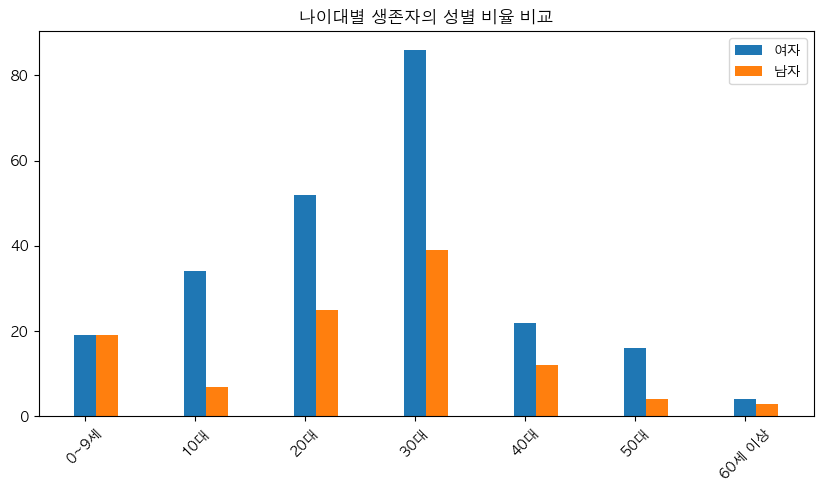

In [84]:
idx = np.arange(len(labels))

plt.figure(figsize = (10, 5))
plt.title('나이대별 생존자의 성별 비율 비교')
plt.bar(idx, woman_list, width = 0.2, label = '여자')
plt.bar(idx + 0.2, man_list, width = 0.2, label = '남자')
plt.xticks(idx, labels, rotation = 45)
plt.legend()
plt.show()
# 전반적으로 모든 연령대에서 여성이 더 많이 생존